In [46]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import matplotlib
import pandas as pd

%matplotlib inline

matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{xfrac,fontspec,unicode-math}"]
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{mathastext}"]

font = 22   
legendfont = 18
matplotlib.rc('font',weight='bold')
matplotlib.rc('font',size=font)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

In [60]:
var_v = ['CV','nospacecharge','dicharge','lightyeild','nodeltaray','stretchResp','altDeadChannels','deadSaturatedChannels','noPEnoise','noShortedResp','whitenoise','enhancedexttpcvis','lifetime10ms','dl0','dt0','birksrecomb','nohadronic']

In [48]:
csv = pd.read_csv('2shrMCBNBCos.csv')
df = pd.DataFrame(csv,columns=['Total','Sel2_Raw','TwoShr_Raw','Sig_Raw','Sel2_CV','TwoShr_CV','Sig_CV'])
#df = pd.DataFrame(csv,columns=['Total','Sel2_Raw','2Shr_Raw','Sig_Raw','Sel2_CV','2Shr_CV','Sig_CV','Sel2_BNB','2Shr_BNB','Sig_BNB'])

In [87]:
df['PD_Sel2_CV'] = [float(abs(df.Sel2_CV.values[0] - df.Sel2_CV.values[i]))/df.Sel2_CV.values[0]\
                    for i in xrange(df.Sel2_CV.shape[0])]

df['PD_TwoShr_CV'] = [float(abs(df.TwoShr_CV.values[0] - df.TwoShr_CV.values[i]))/df.TwoShr_CV.values[0]\
                    for i in xrange(df.TwoShr_CV.shape[0])]

df['PD_Sig_CV'] = [float(abs(df.Sig_CV.values[0] - df.Sig_CV.values[i]))/df.Sig_CV.values[0]\
                    for i in xrange(df.Sig_CV.shape[0])]

In [88]:
df.PD_Sel2_CV.values

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
Total           17 non-null int64
Sel2_Raw        17 non-null int64
TwoShr_Raw      17 non-null int64
Sig_Raw         17 non-null int64
Sel2_CV         17 non-null int64
TwoShr_CV       17 non-null int64
Sig_CV          17 non-null int64
PD_Sel2_CV      17 non-null float64
PD_2Shr_CV      17 non-null float64
PD_Sig_CV       17 non-null float64
PD_TwoShr_CV    17 non-null float64
dtypes: float64(4), int64(7)
memory usage: 1.5 KB


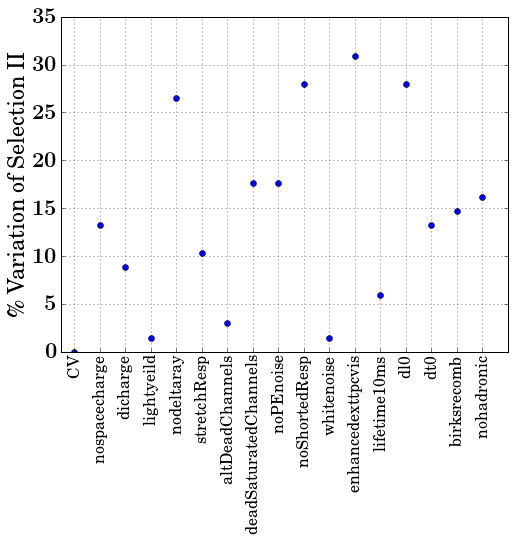

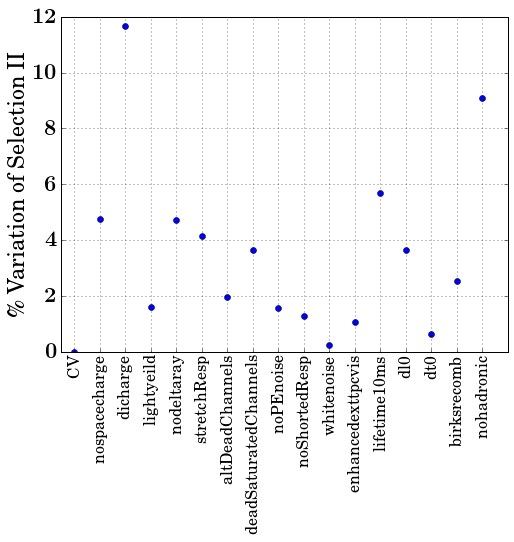

In [90]:
a = np.linspace(0,16,17)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(a,df.PD_TwoShr_CV.values*100,'bo')
plt.grid(True)
#plt.legend(loc=0)
plt.xticks(rotation=90)
ax.set_xticks([i for i in xrange(0,len(var_v))])
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(var_v,fontsize=16) #,weight='bold')
plt.xlim(-0.5, len(var_v))
plt.ylabel('\% Variation of Selection II')

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(a,df.PD_Sel2_CV.values*100,'bo')
plt.grid(True)
#plt.legend(loc=0)
plt.xticks(rotation=90)
ax.set_xticks([i for i in xrange(0,len(var_v))])
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(var_v,fontsize=16) #,weight='bold')
plt.xlim(-0.5, len(var_v))
plt.ylabel('\% Variation of Selection II')